In [1]:
#import all dictionaries

%matplotlib inline
import pandas as pd
import numpy as np
from numpy import median
from numpy import mean
from numpy import histogram
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime, timedelta, date

In [2]:
#load dataset

kick = pd.read_csv('/Users/dkrupnik/Documents/ga-datascience/ga-projects/Data/ks-projects-201801.csv')

In [3]:
kick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
#viewing top line data set metrics
kick.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
#checking for N/A values

kick.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [6]:
#filling null values

kick[['usd pledged']] = kick[['usd pledged']].fillna(0)

In [7]:
#feature engineering

#convert dates to datetime

kick['deadline'] = pd.to_datetime(kick['deadline'])
kick['launched'] = pd.to_datetime(kick['launched'])

#reformatting dates
kick['day_diff'] = (kick.deadline - kick.launched)
kick['day_diff'] = (kick.day_diff / np.timedelta64(1, 'D')).astype(int)

#average dollars per day
kick['dpd'] = kick['usd_pledged_real'] / kick['day_diff']

#dollars per backer
kick['pledged_per_backer'] = kick['usd_pledged_real'] / kick['backers']

#pledge to goal metrics
kick['pledge-to-goal_tot'] = kick['usd_pledged_real'] - kick['usd_goal_real']
kick['pledge-to-goal_perc'] = kick['usd_pledged_real'] / kick['usd_goal_real']

In [8]:
#get dummies for State column
state_dum = pd.get_dummies(kick['state'])
kick = pd.concat([kick, state_dum])


In [9]:
kick.columns

Index(['ID', 'backers', 'canceled', 'category', 'country', 'currency',
       'day_diff', 'deadline', 'dpd', 'failed', 'goal', 'launched', 'live',
       'main_category', 'name', 'pledge-to-goal_perc', 'pledge-to-goal_tot',
       'pledged', 'pledged_per_backer', 'state', 'successful', 'suspended',
       'undefined', 'usd pledged', 'usd_goal_real', 'usd_pledged_real'],
      dtype='object')

In [11]:
kick = kick.fillna(0)

In [12]:
kick.head()

,ID,backers,canceled,category,country,currency,day_diff,deadline,dpd,failed,...,pledge-to-goal_tot,pledged,pledged_per_backer,state,successful,suspended,undefined,usd pledged,usd_goal_real,usd_pledged_real
0,1.000002e+09,0.0,0.0,Poetry,GB,GBP,58.0,2015-10-09 00:00:00,0.000000,0.0,...,-1533.95,0.0,0.000000,failed,0.0,0.0,0.0,0.0,1533.95,0.0
1,1.000004e+09,15.0,0.0,Narrative Film,US,USD,59.0,2017-11-01 00:00:00,41.033898,0.0,...,-27579.00,2421.0,161.400000,failed,0.0,0.0,0.0,100.0,30000.00,2421.0
2,1.000004e+09,3.0,0.0,Narrative Film,US,USD,44.0,2013-02-26 00:00:00,5.000000,0.0,...,-44780.00,220.0,73.333333,failed,0.0,0.0,0.0,220.0,45000.00,220.0
3,1.000008e+09,1.0,0.0,Music,US,USD,29.0,2012-04-16 00:00:00,0.034483,0.0,...,-4999.00,1.0,1.000000,failed,0.0,0.0,0.0,1.0,5000.00,1.0
4,1.000011e+09,14.0,0.0,Film & Video,US,USD,55.0,2015-08-29 00:00:00,23.327273,0.0,...,-18217.00,1283.0,91.642857,canceled,0.0,0.0,0.0,1283.0,19500.00,1283.0


In [13]:
#checking for NA values in dummies
state_dum.isna().sum()

canceled      0
failed        0
live          0
successful    0
suspended     0
undefined     0
dtype: int64

In [14]:
#seting quartiles as integers
g0 = kick['usd_goal_real'].quantile(q=0)
g25 = kick['usd_goal_real'].quantile(q=.25)
g50 = kick['usd_goal_real'].quantile(q=.50)
g75 = kick['usd_goal_real'].quantile(q=.75)
g100 = kick['usd_goal_real'].quantile(q=1)

def get_goal_quartile(val):
    for val in kick['usd_goal_real']:
        if val >= g0 and val < g25:
            q = '0-25th percentile'
        elif val >= g25 and val < g50:
            q = '25-50th percentile'
        elif val >= g50 and val < g75:
            q = '50-75th percentile'
        elif val >= g75 and val < g100:
            q = '75-99th percentile'
    return q
    
    
kick['quartile'] = get_goal_quartile(kick['usd_goal_real'])

In [33]:
#get number for day of year
doy = kick['launched'].timetuple().tm_yday

spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
winter = range(356,365)

def get_launch_season(i):
    for i in kick['launched']:
        if doy in spring:
              season = 'spring'
        elif doy in summer:
              season = 'summer'
        elif doy in fall:
              season = 'fall'
        else:
              season = 'winter'
        return season

kick['launch_season'] = get_launch_season(kick['launched'])

AttributeError: 'Series' object has no attribute 'timetuple'

In [15]:
kick.quartile.describe()

count                 757322
unique                     1
top       25-50th percentile
freq                  757322
Name: quartile, dtype: object

In [16]:
kick.groupby('main_category')['usd_goal_real', 'backers', 'usd_pledged_real', 'pledge-to-goal_perc'].mean().sort_values('pledge-to-goal_perc')

,usd_goal_real,backers,usd_pledged_real,pledge-to-goal_perc
main_category,,,,
0,0.000000,0.000000,0.000000,0.000000
Journalism,86003.395014,38.294637,2615.702568,0.501306
Photography,12266.843699,39.714074,3571.909322,0.614287
Dance,9588.328548,42.801221,3452.946356,0.807196
Food,49039.620804,54.172466,5113.669716,0.838847
Fashion,22412.409361,61.447800,5712.450839,1.003884
Theater,27088.321275,47.057271,4005.918099,1.009208
Film & Video,82625.292254,66.015208,6157.978427,1.511035
Publishing,24798.240254,55.966018,3349.951931,1.823919


In [17]:
kick.groupby('main_category')['usd_goal_real', 'backers', 'usd_pledged_real', 'pledge-to-goal_perc'].median().sort_values('pledge-to-goal_perc')

,usd_goal_real,backers,usd_pledged_real,pledge-to-goal_perc
main_category,,,,
0,0.00,0.0,0.000,0.000000
Journalism,5000.00,2.0,51.000,0.011556
Technology,20000.00,7.0,321.000,0.022600
Food,10000.00,6.0,255.000,0.038625
Crafts,2345.00,3.0,94.000,0.046502
Fashion,5938.52,5.0,243.215,0.056354
Publishing,5000.00,7.0,275.000,0.072500
Photography,4000.00,6.0,240.580,0.080000
Film & Video,6597.87,12.0,746.000,0.132422


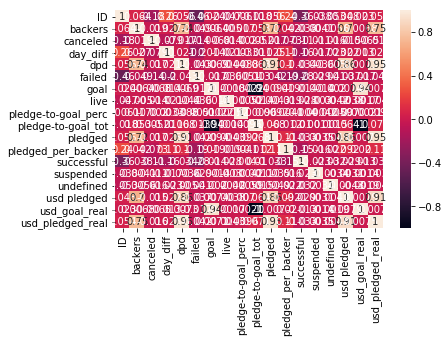

In [34]:
corr = kick.corr()
sns.heatmap(corr, annot = True)

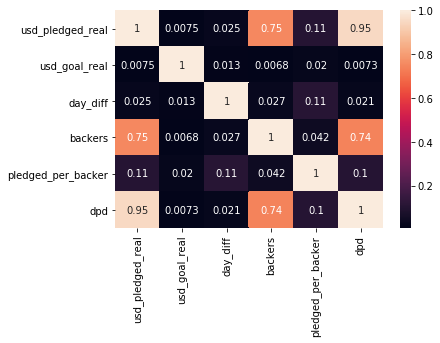

In [18]:
corr = kick[['usd_pledged_real','usd_goal_real', 'day_diff', 'backers', 'pledged_per_backer', 'dpd']].corr()
sns.heatmap(corr, annot = True)

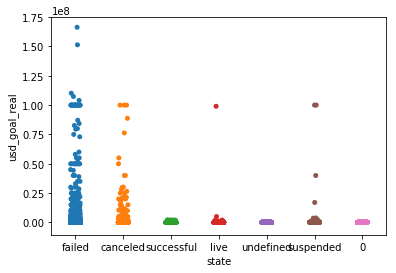

In [19]:
sns.stripplot(x="state", y="usd_goal_real", data=kick, jitter = True)

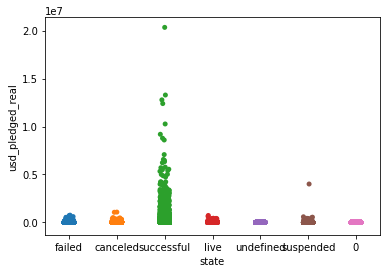

In [20]:
sns.stripplot(x="state", y="usd_pledged_real", data=kick, jitter = True)

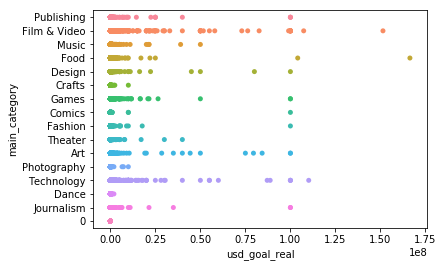

In [21]:
sns.stripplot(x="usd_goal_real", y="main_category", data=kick)

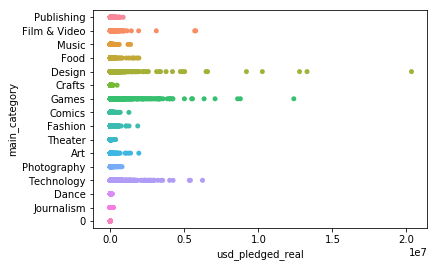

In [22]:
sns.stripplot(x="usd_pledged_real", y="main_category", data=kick)

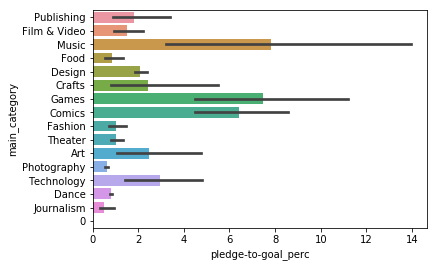

In [23]:
sns.barplot(x="pledge-to-goal_perc", y="main_category", data=kick)

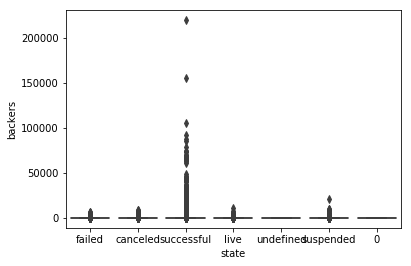

In [24]:
sns.boxplot('state', 'backers', data=kick)

C:\Users\dkrupnik\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\dkrupnik\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:36: RuntimeWarning: invalid value encountered in double_scalars
  return int(np.ceil((a.max() - a.min()) / h))


ValueError: cannot convert float NaN to integer

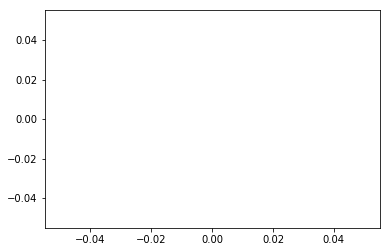

In [29]:
dist = kick['backers']
sns.distplot(np.log(dist))

In [32]:
oldest = min(launch_date)

NameError: name 'launch_date' is not defined